# Clustering and PCA Assignment 

#### Problem Statement 

* Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country.
* Then you need to suggest the countries which the CEO needs to focus on the most. 

### Task 1 

*  Perform PCA on the dataset and obtain the new dataset with the Principal Components. 
Choose the appropriate number of components k. 
* You need to perform your clustering activity on this new dataset,i.e. the PCA modified dataset with the k components.

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
import warnings
warnings.filterwarnings("ignore") 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.decomposition import PCA

In [2]:
country = pd.read_csv("D:/Learning/Machine Learning/Assignment Data/Country-data.csv")

In [3]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
country.shape

(167, 10)

In [6]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# Checking For null values
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# Checking for outliers 
country.describe(percentiles=[.005, .01, .5,  .99, .995])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
0.5%,2.766000,1.844530,1.942800,9.805203,684.530000,-3.388300,44.052000,1.216400,310.680000
1%,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
99.5%,168.160000,179.250000,14.829000,157.400000,97361.000000,55.777000,82.717000,6.743000,90724.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# converting the data to %  of totals
country['exports']= country['exports']*country['gdpp']/100
country['health']= country['health']*country['gdpp']/100
country['imports']= country['imports']*country['gdpp']/100

In [10]:
# Some more stats on Outliers 
tmp=country.copy()
tmp.shape

(167, 10)

### TASK 2 
```Outlier Analysis: ``` 
* You must perform the Outlier Analysis on the dataset, before or after performing PCA, as per your choice. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed.
* Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.

In [11]:
# removing (statistical) outliers

Q1 = tmp.income.quantile(0.00)
Q3 = tmp.income.quantile(0.99)

print("Inter Quantile Range for Income(0.05%-->99.5%) : ",Q1,Q3)
cntry=(tmp[(tmp.income <= Q3)])
remdata=(tmp[(tmp.income > Q3)]) 

Inter Quantile Range for Income(0.05%-->99.5%) :  609.0 84374.00000000003


In [12]:
# Checking for outliers 
cntry.describe(percentiles=[.005, .01, .5,  .99, .995])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.662424,6131.493621,1012.384940,5663.172134,16039.169697,7.811915,70.436364,2.961273,12058.872727
std,40.412953,11299.300106,1724.776687,9680.894653,16435.380743,10.629770,8.879581,1.517963,16355.996959
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0.5%,2.764000,17.090110,15.075298,74.369837,683.620000,-3.398200,43.908000,1.215600,309.720000
1%,2.928000,22.194064,16.965748,104.474560,740.960000,-2.375200,47.140000,1.242800,331.480000
50%,19.700000,1773.000000,306.250000,1994.720000,9940.000000,5.390000,73.100000,2.410000,4610.000000
99%,153.600000,48614.120000,8415.441600,40612.732000,73216.000000,41.612000,82.380000,6.564400,63976.000000
99.5%,168.640000,57908.020000,8594.228000,49138.030000,76172.000000,56.358000,82.718000,6.752000,76976.000000
max,208.000000,93200.000000,8663.600000,81084.000000,80600.000000,104.000000,82.800000,7.490000,87800.000000


In [13]:
# removed 2 data ... 
remdata

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.98,79.5,2.07,70300


In [14]:
y=cntry.pop('country')

In [15]:
# Scaling Of Data

scaler = StandardScaler()
cpy = cntry.copy()
cpy = scaler.fit_transform(cpy)


In [16]:
# Appling PCA on this Data 

pca = PCA(random_state=42)
pca.fit(cpy)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_ratio_

array([0.61727091, 0.16363988, 0.09940868, 0.06160221, 0.02520655,
       0.02079283, 0.00943787, 0.00181464, 0.00082643])

<BarContainer object of 9 artists>

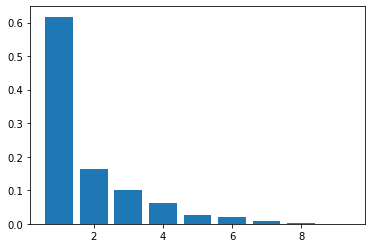

In [18]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

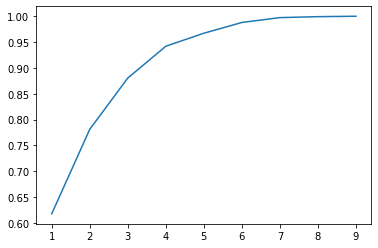

In [19]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [20]:
#90% of variance is explained by 4 variables 
pc2 = PCA(n_components=4, random_state=42)

In [21]:
newdata = pc2.fit_transform(cpy)

In [22]:
newdata.shape

(165, 4)

In [23]:
country_1=pd.DataFrame(newdata,columns=["PC1","PC2","PC3","PC4"])

In [24]:
country_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
PC1    165 non-null float64
PC2    165 non-null float64
PC3    165 non-null float64
PC4    165 non-null float64
dtypes: float64(4)
memory usage: 5.2 KB


In [25]:
# Checking for outliers 
country_1.describe(percentiles=[.005, .01, .5,  .99, .995])

,PC1,PC2,PC3,PC4
count,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,-5.382900e-18,6.728624e-18,-3.599814e-17,-4.625929e-18
std,2.364173e+00,1.217267e+00,9.487537e-01,7.468604e-01
min,-4.050553e+00,-1.787454e+00,-1.762085e+00,-3.522287e+00
0.5%,-4.036516e+00,-1.594119e+00,-1.633851e+00,-2.538712e+00
1%,-3.600126e+00,-1.538519e+00,-1.429025e+00,-1.971904e+00
50%,-4.027825e-01,-3.881321e-01,-1.678240e-01,8.181694e-02
99%,7.148845e+00,3.326854e+00,3.105483e+00,1.673399e+00
99.5%,7.865778e+00,3.909435e+00,4.434758e+00,2.748148e+00
max,9.022176e+00,4.689487e+00,7.885627e+00,6.157906e+00


In [26]:
country_1.shape

(165, 4)

In [27]:
country_1.head()

,PC1,PC2,PC3,PC4
0,-2.751017,1.365823,-0.552365,-0.151390
1,-0.063604,-1.531116,-0.000074,0.230485
2,-0.490192,-0.754572,0.970084,0.096282
3,-2.775187,2.134260,0.589487,-0.211224
4,0.781361,-0.973841,-0.250301,0.244940


In [28]:
cntry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### TASK 3 
Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters.                       

[Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]

In [29]:
# Use the hopkins stats to see if the dataframe is suitable for Clustering or not
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [82]:
hopkins(country_1)

0.9158755832837039

#### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

```so with a score of .80+ it can be clusterred``` 

###  K- Means 


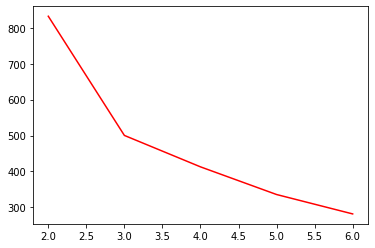

In [86]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_1)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters, ssd,"r")
plt.show()


### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

In [32]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
  

For n_clusters=2, the silhouette score is 0.5078843038294154
For n_clusters=3, the silhouette score is 0.4624512276555219
For n_clusters=4, the silhouette score is 0.455315420789234
For n_clusters=5, the silhouette score is 0.4624877522934703
For n_clusters=6, the silhouette score is 0.37347720813687335
For n_clusters=7, the silhouette score is 0.35038111411215167
For n_clusters=8, the silhouette score is 0.35934072009880375


In [33]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_1)
KM_cluster_labels = kmeans.labels_
KM_cluster_labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [34]:
cntry['KM-cluster_labels']=KM_cluster_labels

In [35]:
cntry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM-cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


### Hierarchical Clustering

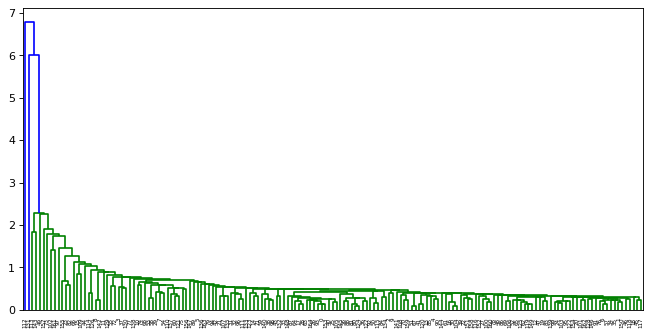

In [36]:
# single linkage
plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k') 
mergings = linkage(country_1 , method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

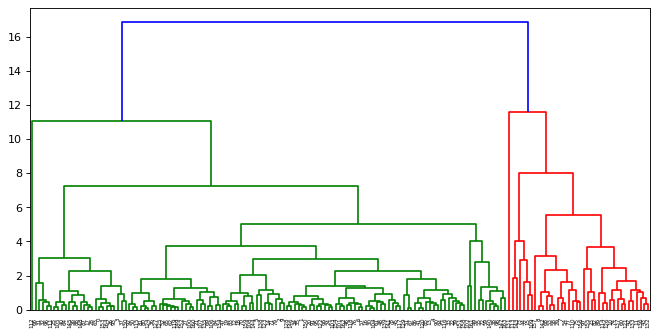

In [37]:
# complete linkage
plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k') 
mergings = linkage(country_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

complete linkage gave more accurate dendogram so chose complete linkage for hirarchical clusturing 

In [38]:
# 3 clusters
Hcluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
Hcluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
cntry['H-cluster_labels']=Hcluster_labels

In [40]:
cntry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM-cluster_labels,H-cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0


In [41]:
country_1['H-cluster_labels']=Hcluster_labels

In [42]:
country_1['KM-cluster_labels']=KM_cluster_labels

In [43]:
country_1.head()

,PC1,PC2,PC3,PC4,H-cluster_labels,KM-cluster_labels
0,-2.751017,1.365823,-0.552365,-0.151390,0,1
1,-0.063604,-1.531116,-0.000074,0.230485,0,2
2,-0.490192,-0.754572,0.970084,0.096282,0,2
3,-2.775187,2.134260,0.589487,-0.211224,0,1
4,0.781361,-0.973841,-0.250301,0.244940,0,2


#### TASK - 4 
* Analyse the clusters and identify the ones which are in dire need of aid.
- You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. 

Note that you perform clustering on the PCA modified dataset and the clusters that are formed are being analysed now using the original variables to identify the countries which you finally want to select.

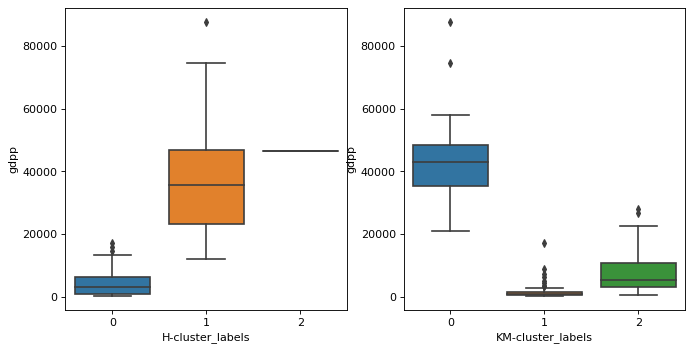

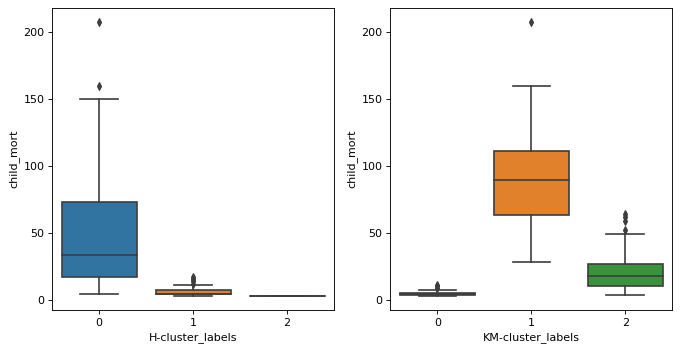

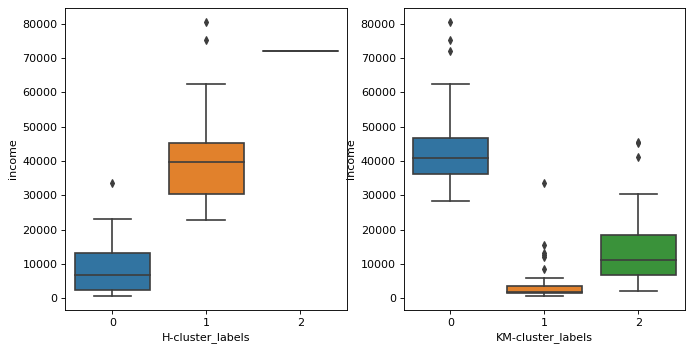

In [44]:
plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(1, 2, 1)
sns.boxplot(x="H-cluster_labels",y='gdpp',data=cntry)
plt.subplot(1, 2, 2)
sns.boxplot(x="KM-cluster_labels",y='gdpp',data=cntry)

plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(1, 2, 1)
sns.boxplot(x="H-cluster_labels",y='child_mort',data=cntry)
plt.subplot(1, 2, 2)S
sns.boxplot(x="KM-cluster_labels",y='child_mort',data=cntry)

plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(1, 2, 1)
sns.boxplot(x="H-cluster_labels",y='income',data=cntry)
plt.subplot(1, 2, 2)
sns.boxplot(x="KM-cluster_labels",y='income',data=cntry)


#### TASK -5 
- you need to perform visualisations on the clusters that have been formed.  
- You can do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. 
- You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc. 

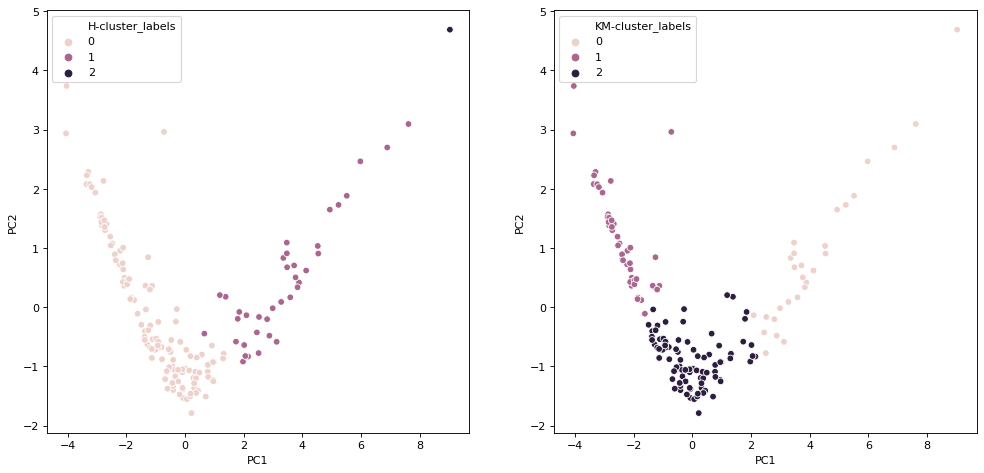

In [45]:
plt.figure(num=None, figsize=(15,7), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(1, 2, 1)
sns.scatterplot(x="PC1", y="PC2",hue="H-cluster_labels", data=country_1)
plt.subplot(1, 2, 2)
sns.scatterplot(x="PC1", y="PC2",hue="KM-cluster_labels", data=country_1)


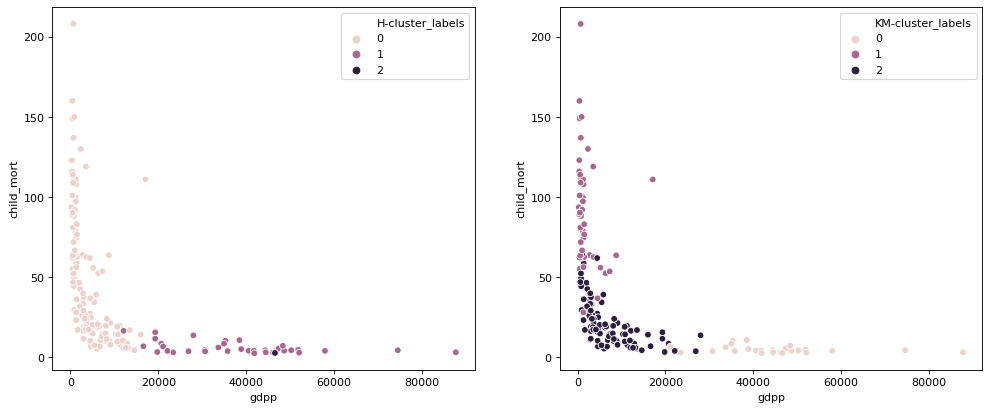

In [46]:
plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(1, 2, 1)
sns.scatterplot(x="gdpp", y="child_mort",hue="H-cluster_labels", data=cntry)
plt.subplot(1, 2, 2)
sns.scatterplot(x="gdpp", y="child_mort",hue="KM-cluster_labels", data=cntry)


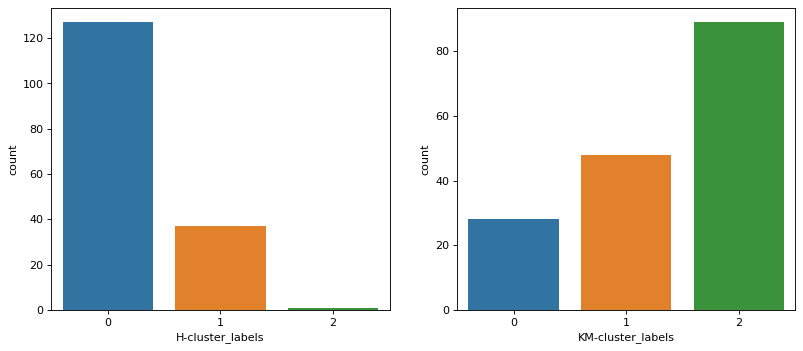

In [47]:
# some stats of clusters 
plt.figure(num=None, figsize=(12,5), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(1, 2, 1)
sns.countplot(x="H-cluster_labels", data=country_1)
plt.subplot(1, 2, 2)
sns.countplot(x="KM-cluster_labels", data=country_1)


In [48]:
country_1['H-cluster_labels'].value_counts()

0    127
1     37
2      1
Name: H-cluster_labels, dtype: int64

In [49]:
country_1['KM-cluster_labels'].value_counts()

2    89
1    48
0    28
Name: KM-cluster_labels, dtype: int64

In [50]:
cntry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM-cluster_labels,H-cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0


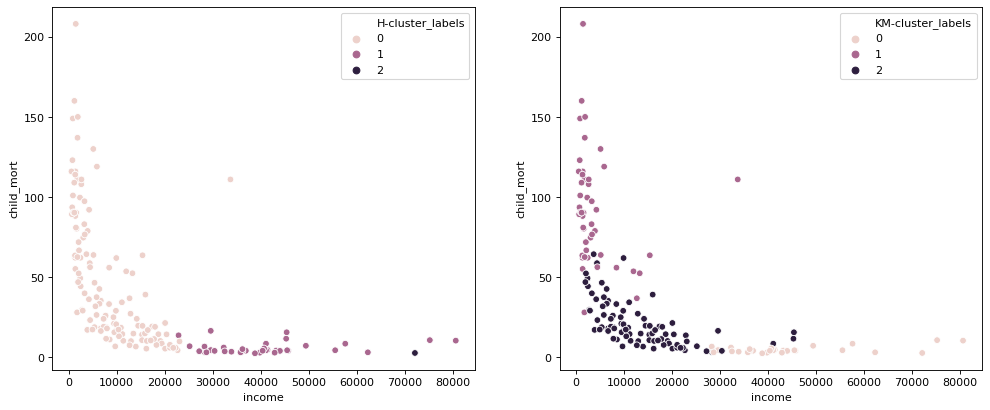

In [51]:
plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(1, 2, 1)
sns.scatterplot(x="income", y="child_mort",hue="H-cluster_labels", data=cntry)
plt.subplot(1, 2, 2)
sns.scatterplot(x="income", y="child_mort",hue="KM-cluster_labels", data=cntry)


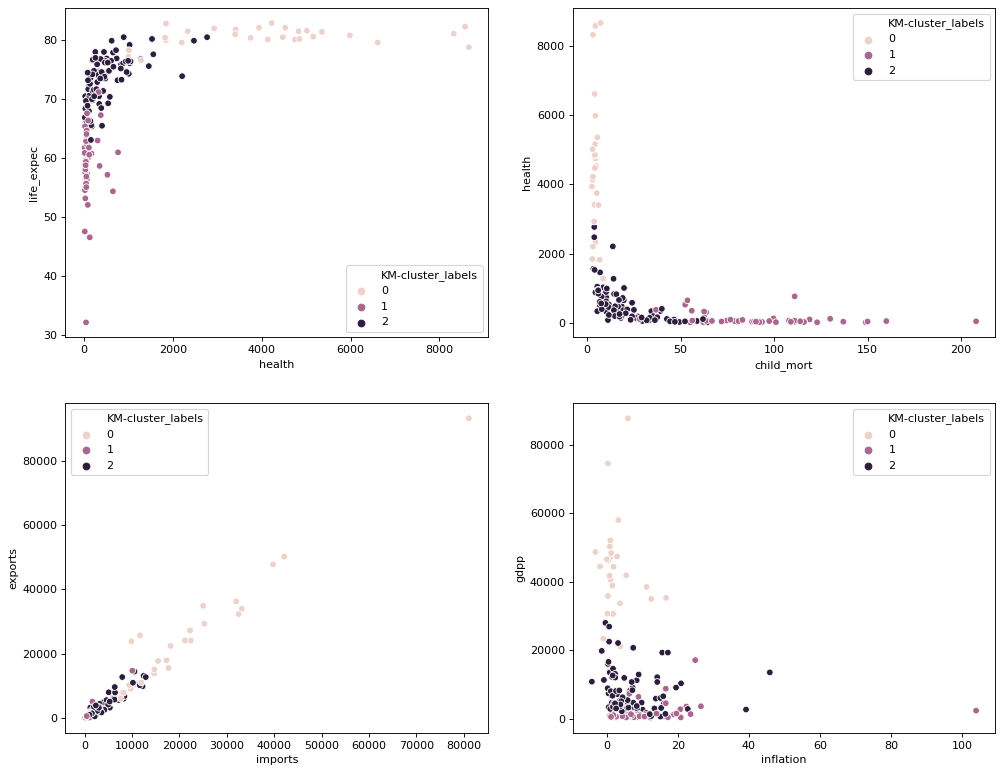

In [52]:
# lets consider only K means as the cluster #2 makes more sense 
plt.figure(num=None, figsize=(15,12), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(2, 2, 1)
sns.scatterplot(x="health", y="life_expec",hue="KM-cluster_labels", data=cntry)
plt.subplot(2, 2, 2)
sns.scatterplot(x="child_mort", y="health",hue="KM-cluster_labels", data=cntry)
plt.subplot(2, 2, 3)
sns.scatterplot(x="imports", y="exports",hue="KM-cluster_labels", data=cntry)
plt.subplot(2, 2, 4)
sns.scatterplot(x="inflation", y="gdpp",hue="KM-cluster_labels", data=cntry)


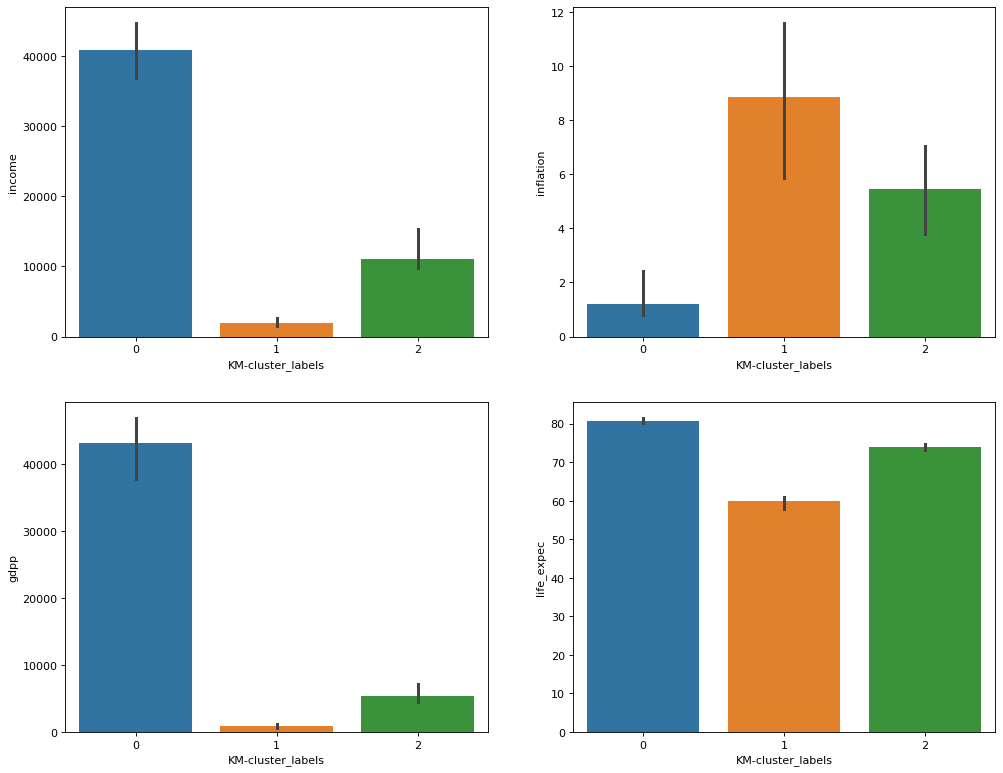

In [53]:
# lets consider only K means as the cluster #2 makes more sense 
from numpy import median
plt.figure(num=None, figsize=(15,12), dpi=80, facecolor='w', edgecolor='k') 
plt.subplot(2, 2, 1)
sns.barplot(x="KM-cluster_labels", y="income", data=cntry, estimator=median)
plt.subplot(2, 2, 2)
sns.barplot(x="KM-cluster_labels", y="inflation", data=cntry, estimator=median)
plt.subplot(2, 2, 3)
sns.barplot(x="KM-cluster_labels", y="gdpp", data=cntry, estimator=median)
plt.subplot(2, 2, 4)
sns.barplot(x="KM-cluster_labels", y="life_expec", data=cntry, estimator=median)

#### TASK 6
The final list of countries depends on the number of components that you choose and the number of clusters that you finally form. Also, both K-means and Hierarchical may give different results. 
Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

In [54]:
cntry = pd.concat([cntry, y], axis=1)

In [55]:
cntry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM-cluster_labels,H-cluster_labels,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0,Antigua and Barbuda


In [71]:
cntry_poor = cntry[cntry['KM-cluster_labels']==1]

In [72]:
# names of countries
cntry_poor.country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

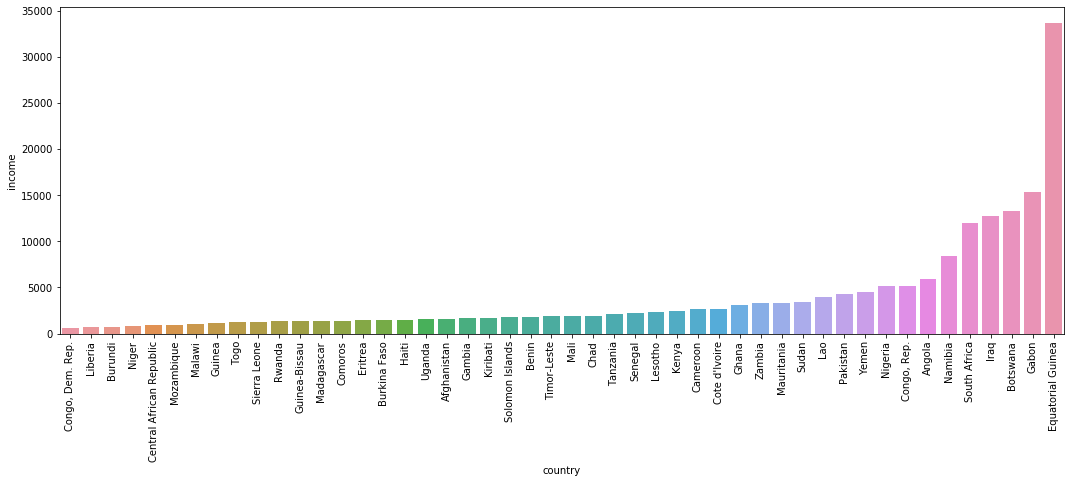

In [73]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', y="income", data=cntry_poor.sort_values(by="income"))
plt.xticks(rotation = 90)
plt.show()

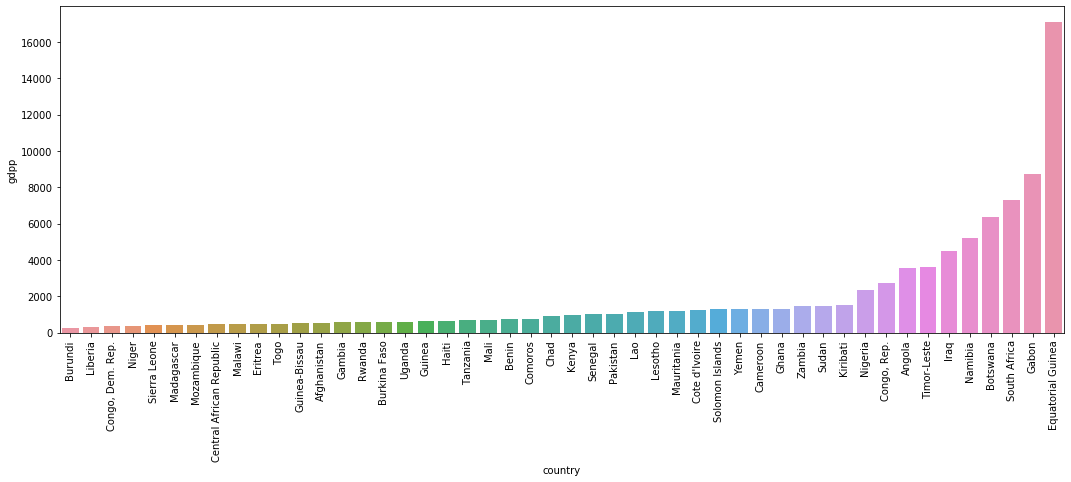

In [74]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', y="gdpp", data=cntry_poor.sort_values(by="gdpp"))
plt.xticks(rotation = 90)
plt.show()

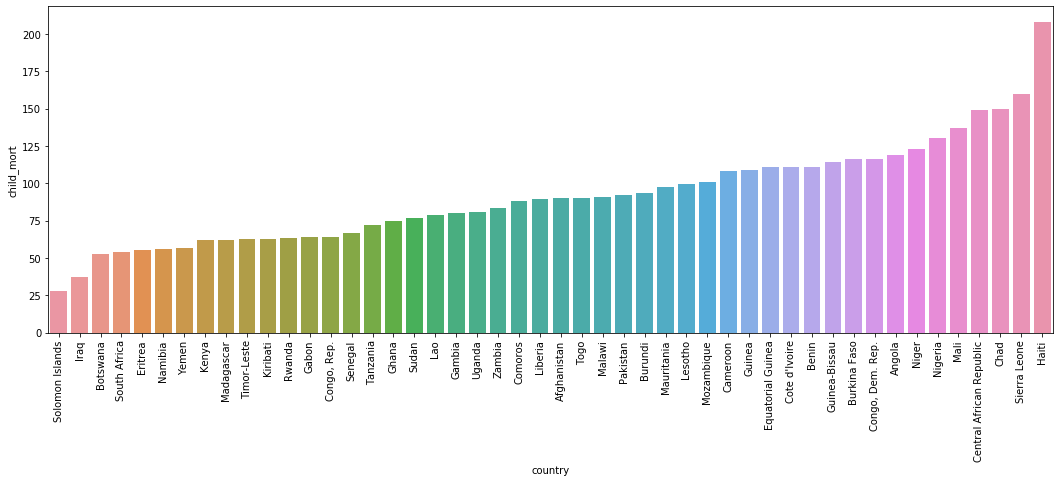

In [75]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', y="child_mort", data=cntry_poor.sort_values(by="child_mort"))
plt.xticks(rotation = 90)
plt.show()

In [76]:
# Creating a New Variable for ordering countries based on socio economic status 
cntry_poor.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM-cluster_labels,H-cluster_labels,country
0,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,1,0,Afghanistan
3,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1,0,Angola
17,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,1,0,Benin
21,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,1,0,Botswana
25,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,1,0,Burkina Faso


In [77]:
cntry_poor['ecovar']=cntry_poor['income']*cntry_poor['gdpp']/cntry_poor['inflation']

In [78]:
len(cntry_poor)

48

In [79]:
# final list of poor contries ordered by thier poorness ,top one need economic help most 
cntry_poor.sort_values(by="ecovar").country.head(50)


37             Congo, Dem. Rep.
26                      Burundi
132                Sierra Leone
94                       Malawi
88                      Liberia
63                       Guinea
106                  Mozambique
50                      Eritrea
93                   Madagascar
155                      Uganda
0                   Afghanistan
112                       Niger
113                     Nigeria
25                 Burkina Faso
147                    Tanzania
66                        Haiti
31     Central African Republic
99                   Mauritania
56                       Gambia
59                        Ghana
165                       Yemen
149                 Timor-Leste
142                       Sudan
64                Guinea-Bissau
32                         Chad
36                      Comoros
126                      Rwanda
97                         Mali
136             Solomon Islands
166                      Zambia
116                    Pakistan
84      